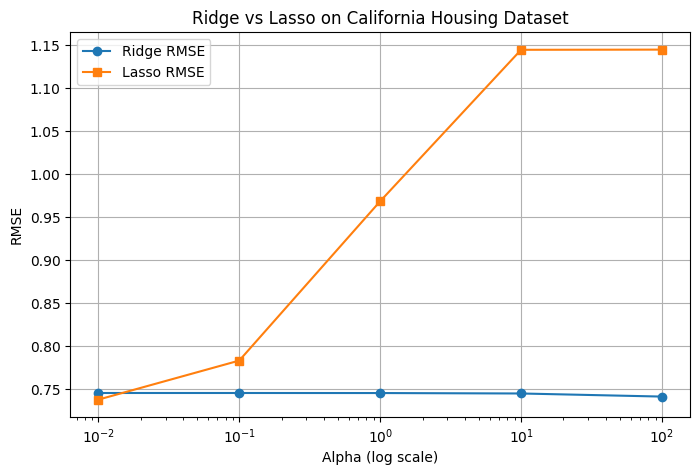

Final Evaluation at α = 1
Ridge R²: 0.5758549611440138
Lasso R²: 0.2841671821008396


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

data = fetch_california_housing()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = [0.01, 0.1, 1, 10, 100]
ridge_rmse, lasso_rmse = [], []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    ridge_rmse.append(np.sqrt(mean_squared_error(y_test, ridge_pred)))

    lasso = Lasso(alpha=a, max_iter=5000)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    lasso_rmse.append(np.sqrt(mean_squared_error(y_test, lasso_pred)))


plt.figure(figsize=(8,5))
plt.plot(alphas, ridge_rmse, marker='o', label='Ridge RMSE')
plt.plot(alphas, lasso_rmse, marker='s', label='Lasso RMSE')
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("RMSE")
plt.title("Ridge vs Lasso on California Housing Dataset")
plt.legend()
plt.grid(True)
plt.show()

print("Final Evaluation at α = 1")
ridge_final = Ridge(alpha=1).fit(X_train, y_train)
lasso_final = Lasso(alpha=1).fit(X_train, y_train)

print("Ridge R²:", r2_score(y_test, ridge_final.predict(X_test)))
print("Lasso R²:", r2_score(y_test, lasso_final.predict(X_test)))
